# Защита персональных данных клиентов

# Задача

Нужно защитить данные клиентов страховой компании. Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

# План

**1. Загрузка данных.**

    1.1. Проверка данных на наличие дубликатов.
    1.2. Анализ распределений признаков.
    1.3. Проверка данных на аномальность.
    
**2. Умножение матриц.**

**3. Алгоритм преобразования.**
**4. Проверка алгоритма.**
    
    4.1. Написание функции для нашего алгоритма преобразования.
    4.2. Обучение модели без алгоритма.
    4.3. Обучение модели с применением алгоритма.
    
**5. Выводы.**

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
insur_data = pd.read_csv('/datasets/insurance.csv')
insur_data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
insur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропусков в данных нет.

### Провеим данные на наличие дубликатов

In [4]:
insur_data.duplicated().sum()

153

In [5]:
insur_data.loc[insur_data.duplicated() == True]

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


В данных есть 153 дубликата, но они естстественны, т.к. могут встречаться 2 человека с одинаковыми параметрами. Оставим эти строки.

### Посмотрим на распределения признаков.

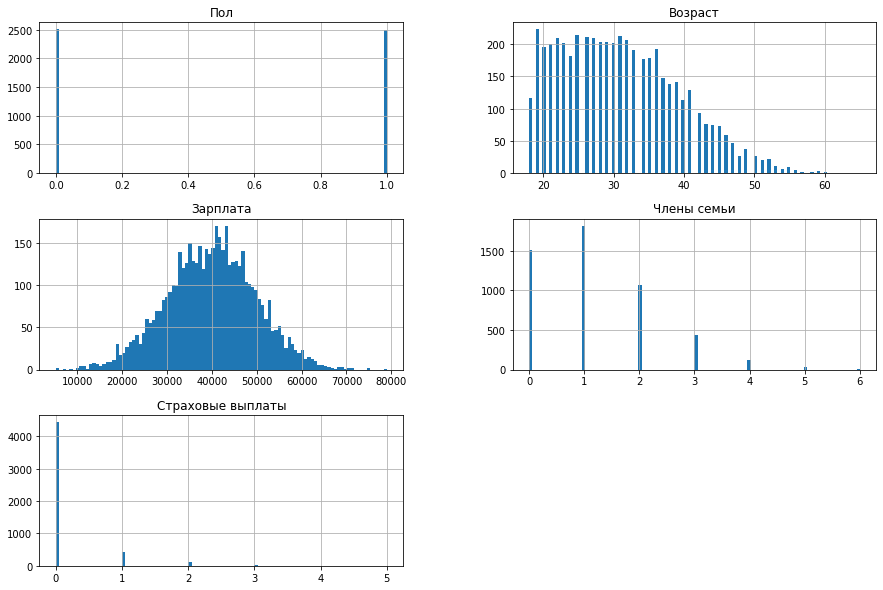

In [6]:
insur_data.hist(figsize=(15,10), bins=100);

У признака "Пол" всего два значения 1 и 0, и они примерон равны, по 2500 примеров.

Самый распространенный "Возраст" в наших данных от 18 до 32 лет, далее идет спад.

"Зарплата" имеет нормальное распределение от 0 до 80 тыс., самое распространенное значение 40 тыс.

Самое распространенное кол-во "Членов семьи" 0 и 1, затем 2, совсем редко 3 и 4, и крайне редко 5 и 6.

Самое распространенное кол-во страховых выплат 0, более 4000 примеров, затем 1, около 500 примеров, и совсем немного примеров с 2, 3, 4 и 5 выплатами. 

### Посмотрим на аномальные значения

In [7]:
insur_data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [8]:
clear_insur_data = insur_data

**Промежуточные выводы**

Мы провели предобработку данных. Проверили налачие аномалий.


## Умножение матриц

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** качество линейной регрессии не изменится.

**Обоснование:** 

Исходная задача: $$ a = Xw,  w = (X^T X)^{-1} X^T y $$
Преобразованная задача: $$ a' = XPw', w' = ((XP)^T XP)^{-1} (XP)^T y$$
Доказательство: $$w' = ((XP)^T XP)^{-1} (XP)^T = (P^T X^T XP)^{-1} P^T X^T y = P^{-1} (P^T X^T X)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w $$
Получили: $$ w' = P^{-1} w $$
Тогда: $$ a' = XPw' = XPP^{-1} w = Xw $$
Таким образом: $$ a' = a $$
Это значит, что при умножении признаков на обратимую матрицу качество линейное регресии не изменится.

## Алгоритм преобразования

**Алгоритм**

Создадим случайную обратимую квадратную матрицу **P** -> Умножим матрицу признаков **X** на случайную матрицу **P** -> Обучим модель -> Расшифруем полученный вектор **a** с предсказаниями

**Обоснование**

$$ a = XPw' = XPP^{-1} w = Xw $$

## Проверка алгоритма

### Напишем функцию для нашего алгоритма преобразования

In [9]:
def matrix_transformation(features):
    size_matr = features.shape[1]
    cipher_matr = np.random.normal(size=(size_matr,size_matr))
    inverse = np.linalg.inv(cipher_matr)
    return features.dot(cipher_matr), inverse

### Обучим модель без алгоритма

In [10]:
features1 = clear_insur_data.drop('Страховые выплаты', axis=1)
target = clear_insur_data['Страховые выплаты']

features_train1, features_test1, target_train1, target_test1 = train_test_split(features1, target,
                                                                            test_size=0.25, random_state=12345)

model1 = LinearRegression()
model1.fit(features_train1, target_train1)
predictions1 = model1.predict(features_test1)

r2_1 = r2_score(target_test1, predictions1)
r2_1

0.43522757127026546

Итак, до преобразования метрика R2 составляет 0.44.

### Обучим модель с применением алгоритма



In [11]:
features2 = clear_insur_data.drop('Страховые выплаты', axis=1)
target = clear_insur_data['Страховые выплаты']

features, inverse_matr = matrix_transformation(features2.values)

features_train2, features_test2, target_train2, target_test2 = train_test_split(features, target,
                                                                            test_size=0.25, random_state=12345)

model2 = LinearRegression()
model2.fit(features_train2, target_train2)
predictions2 = model2.predict(features_test2)

r2_1 = r2_score(target_test2, predictions2)
r2_1

0.43522757127047185

После преобразования метрика R2 по прежнему составляет 0.44.

## Выводы

Мы провели предобработку данных, проверили дубликаты и аномалии.

Мы также подтвердили гипотезу о том, что при умножении признаков на обратимую матриц качество линейной регрессии не изменится.

Для защиты персональных данных мы использовали умножение признаков на обратимую матрицу, осоновываясь на доказанной гипотезе.

Сравнив показатели метрики R2 до и после преобразования данных, мы убедились, что качество модели от преобразования не поменялось. Метрика составила 0.44.